<a href="https://colab.research.google.com/github/AkshatGupta286/Mood_Radio/blob/main/FER(Inception).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
!pip install mtcnn
import mtcnn

     |████████████████████████████████| 2.3 MB 5.3 MB/s 


In [ ]:
# train_dir = "Datasets/FER2013/train" #passing the path with training images
# test_dir = "Datasets/FER2013/test"   #passing the path with testing images

from zipfile import ZipFile
file_name = '/content/FER2013.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
img_size = 48 #original size of the image

In [ ]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )

validation_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 12832 images belonging to 3 classes.
Found 3208 images belonging to 3 classes.


In [ ]:
# Modeling

model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 32,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(3,activation = 'softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs = 60
batch_size = 64

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 12, 12, 128)       512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 128)      

In [ ]:
history = model.fit(x = train_generator, epochs = epochs, validation_data = validation_generator)

Epoch 1/60
201/201 [==============================] - 46s 75ms/step - loss: 1.3253 - accuracy: 0.4151 - val_loss: 1.0853 - val_accuracy: 0.4498
Epoch 2/60
201/201 [==============================] - 14s 71ms/step - loss: 1.1819 - accuracy: 0.4323 - val_loss: 1.1312 - val_accuracy: 0.4489
Epoch 3/60
201/201 [==============================] - 14s 70ms/step - loss: 1.1385 - accuracy: 0.4437 - val_loss: 1.0508 - val_accuracy: 0.4663
Epoch 4/60
201/201 [==============================] - 14s 72ms/step - loss: 1.0992 - accuracy: 0.4570 - val_loss: 1.0503 - val_accuracy: 0.4763
Epoch 5/60
201/201 [==============================] - 15s 73ms/step - loss: 1.0802 - accuracy: 0.4665 - val_loss: 1.0152 - val_accuracy: 0.4988
Epoch 6/60
201/201 [==============================] - 15s 73ms/step - loss: 1.0484 - accuracy: 0.4820 - val_loss: 1.0029 - val_accuracy: 0.5065
Epoch 7/60
201/201 [==============================] - 14s 71ms/step - loss: 1.0239 - accuracy: 0.5041 - val_loss: 0.9954 - val_accuracy:

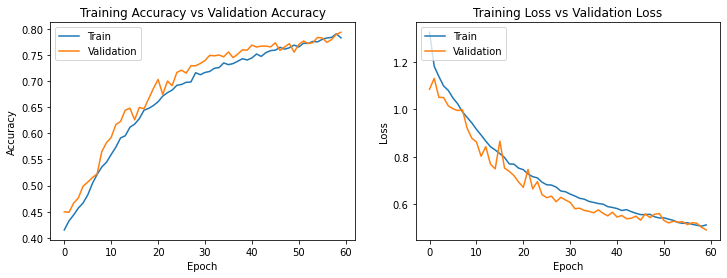

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('FER(Inception).h5')

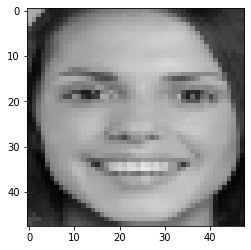

In [ ]:
img = plt.imread('/content/face2.jpg')
detector = mtcnn.MTCNN()
faces = detector.detect_faces(img)
if len(faces) > 0:
    x, y, w, h = faces[0]['box']
    img = img[y:y+h, x:x+w]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img/255
img = cv2.resize(img, (48, 48), interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [ ]:
label_dict = {0:'Angry',1:'Happy',2:'Sad'}
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

[5.320019e-07, 0.99999833, 1.2239468e-06]
Happy


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory( directory = test_dir,  
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "training"
                                                             )

test_loss, test_acc   = model.evaluate(test_generator)

print("\nFinal Test Accuracy = {:.2f}%".format(test_acc*100))

Found 3979 images belonging to 3 classes.
63/63 [==============================] - 2s 29ms/step - loss: 0.4948 - accuracy: 0.7939

Final Test Accuracy = 79.39%
